<a href="https://colab.research.google.com/github/ashi-sharma/car-purchase-prediction-model/blob/master/car_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Car_Purchasing_Data.csv",encoding='latin1')
print(data.shape)
data.head()


(500, 9)


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
data.drop(['Customer Name','Customer e-mail','Country','Gender'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  500 non-null    float64
 1   Annual Salary        500 non-null    float64
 2   Credit Card Debt     500 non-null    float64
 3   Net Worth            500 non-null    float64
 4   Car Purchase Amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
data=pd.DataFrame(data,columns=['Age','Annual Salary','Credit Card Debt','Net Worth','Car Purchase Amount'])

In [ ]:
x = data.iloc[:,:4]
y = data.iloc[:,4]
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

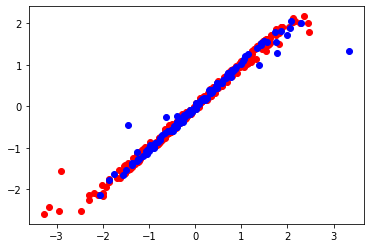

In [ ]:
plt.scatter(y_train,regressor.predict(x_train),color='red')
plt.scatter(y_test,y_pred,color='blue')
plt.show()
